## Classification Project - Vaccine_data 

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as smapi
from sklearn.metrics import classification_report,accuracy_score,roc_curve,auc
from sklearn.feature_selection import f_classif

### Read Data

In [4]:
file = r"E:\NIIT\Project\mini_project\2 classification\vaccine_usage_prediction\vaccine.csv"
data = pd.read_csv(file)
data.head()
data.shape

(26707, 32)

In [6]:
data.dtypes

unique_id                      int64
worry                        float64
awareness                    float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc                      float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
is_health_worker             float64
has_health_insur             float64
is_vacc_effective            float64
sick_from_vacc               float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
housing_status                object
e

In [5]:
# Check null
data.isnull().sum()

unique_id                        0
worry                           92
awareness                      116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc                       2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
is_health_worker               804
has_health_insur             12274
is_vacc_effective              391
sick_from_vacc                 395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment                    1463
census_msa          

In [7]:
# Check for 0
data[data==0].count()

unique_id                        1
worry                         3296
awareness                     2506
antiviral_medication         25335
contact_avoidance             7271
bought_face_mask             24847
wash_hands_frequently         4650
avoid_large_gatherings       17073
reduced_outside_home_cont    17644
avoid_touch_face              8578
dr_recc                      19139
dr_recc_seasonal_vacc        16453
chronic_medic_condition      18446
is_health_worker             23004
has_health_insur              1736
is_vacc_effective                0
sick_from_vacc                   0
is_seas_vacc_effective           0
is_seas_risky                    0
sick_from_seas_vacc              0
age_bracket                      0
qualification                    0
race                             0
sex                              0
income_level                     0
marital_status                   0
housing_status                   0
employment                       0
census_msa          

In [8]:
Cols_to_drop =['has_health_insur','unique_id']
data.drop(columns=Cols_to_drop,inplace= True)
data["income_level"].fillna(value='<= $75,000, Above Poverty',inplace=True)
data.shape
data.dropna(how='any',inplace=True)

In [9]:
# Singularity check 
for c in data:
    x = data[c].value_counts().head(4)/len(data)
    print("\n")
    print(c,"\n",x)



worry 
 2.0    0.402164
1.0    0.315285
3.0    0.164641
0.0    0.117910
Name: worry, dtype: float64


awareness 
 1.0    0.551197
2.0    0.369245
0.0    0.079558
Name: awareness, dtype: float64


antiviral_medication 
 0.0    0.951473
1.0    0.048527
Name: antiviral_medication, dtype: float64


contact_avoidance 
 1.0    0.734991
0.0    0.265009
Name: contact_avoidance, dtype: float64


bought_face_mask 
 0.0    0.932459
1.0    0.067541
Name: bought_face_mask, dtype: float64


wash_hands_frequently 
 1.0    0.83232
0.0    0.16768
Name: wash_hands_frequently, dtype: float64


avoid_large_gatherings 
 0.0    0.643278
1.0    0.356722
Name: avoid_large_gatherings, dtype: float64


reduced_outside_home_cont 
 0.0    0.665331
1.0    0.334669
Name: reduced_outside_home_cont, dtype: float64


avoid_touch_face 
 1.0    0.684853
0.0    0.315147
Name: avoid_touch_face, dtype: float64


dr_recc 
 0.0    0.776842
1.0    0.223158
Name: dr_recc, dtype: float64


dr_recc_seasonal_vacc 
 0.0    0.666

In [10]:
Cols_with_singularity =["antiviral_medication","bought_face_mask","is_health_worker"] 

## EDA 

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_5528\3505635997.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.iloc[:,:].corr()


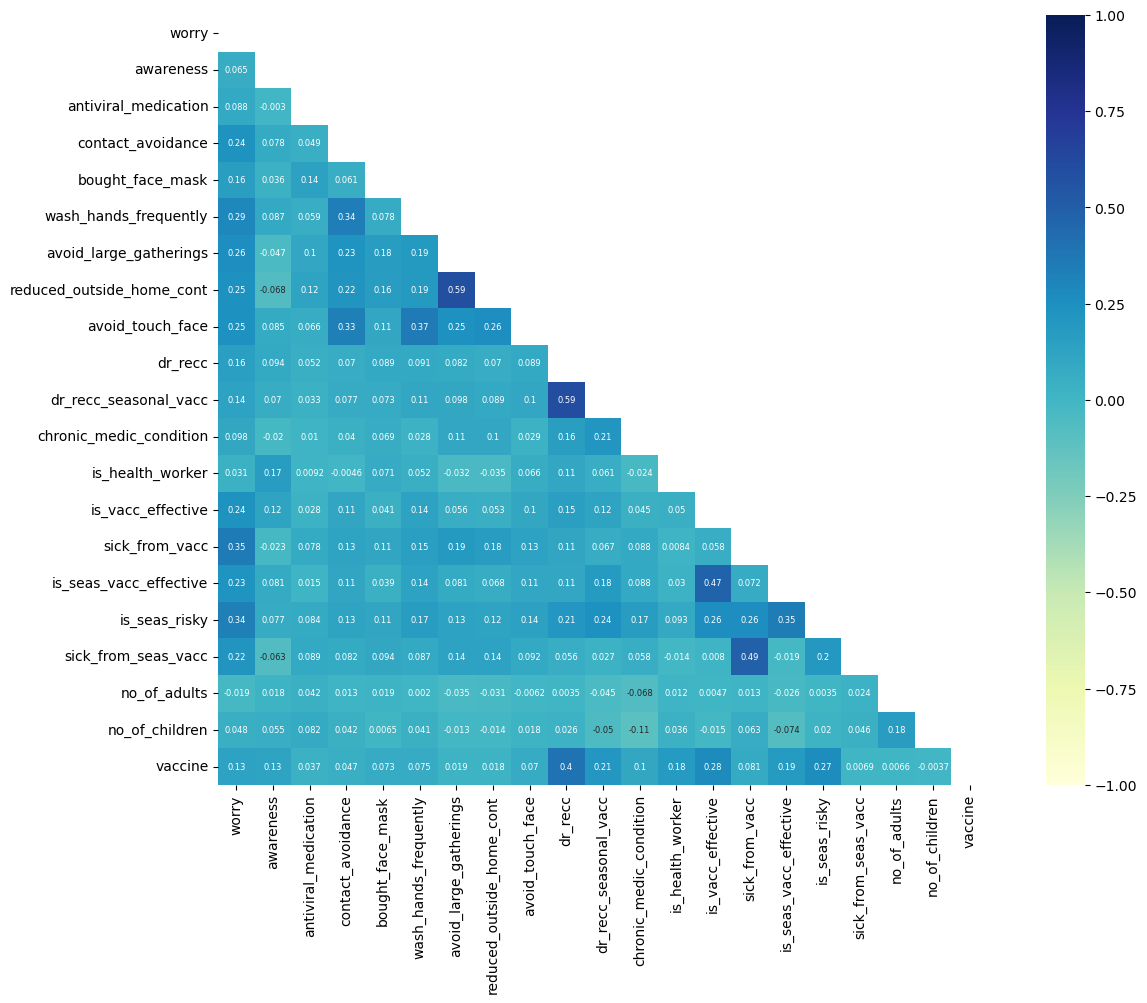

In [11]:
nc = data.select_dtypes(exclude=['object','category']).columns.values;nc
# Multicollinearity,outliers and distribution
# correlation: "c", boxplot: "b", histogram: "h"
def plotData(df,nc,ptype):
    fig = plt.figure(figsize=(15,10))
    if (ptype == "c"):
        cor=data.iloc[:,:].corr()
        mask= np.triu(cor)
        sns.heatmap(cor, cmap="YlGnBu", center=0, annot=True,vmin=-1,  vmax=1, linecolor='w',annot_kws={"fontsize":6}, square=True,mask=mask)
plotData(data, nc, "c")

In [12]:
# Coorelated more than 0.55
correlated_cols = ["reduced_outside_home_cont","dr_recc_seasonal_vacc"]

# Categorical EDA 
cc = data.select_dtypes(include=['object','category']).columns.values;cc

array(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype=object)

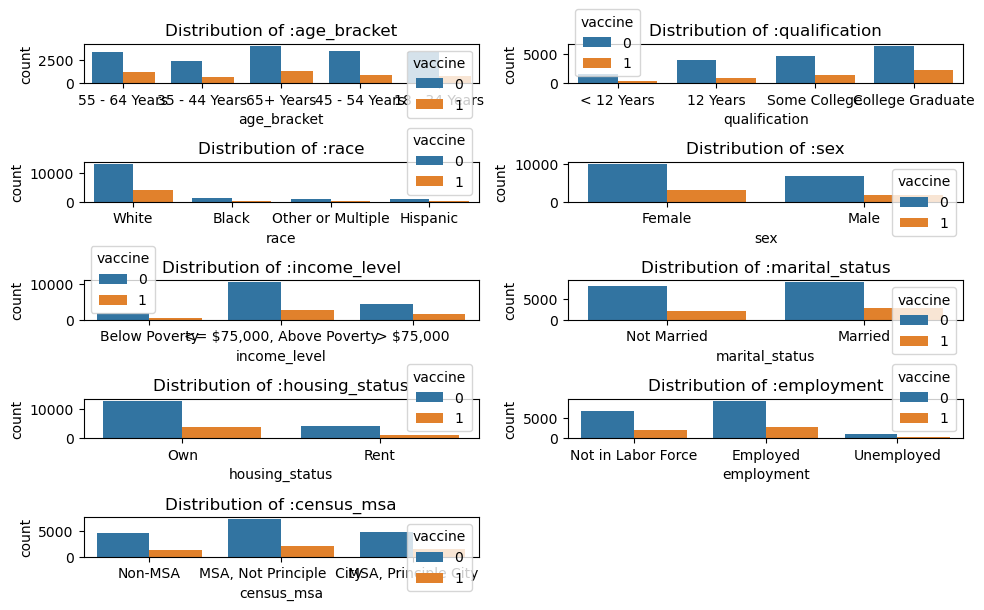

In [14]:
def plotCat(cc,df,hue=None):
    R=7; C=2; P=1
    
    fig = plt.figure(figsize=(10, 8))
    for c in cc:
        fig.add_subplot(R, C, P)
        if hue is not None:
            sns.countplot(x=df[c], hue=df[hue])  # count plot + group by
        else:
            sns.countplot(x=df[c])  # count plot
        plt.title("Distribution of :" + c)
        
        # Increment the subplot index 'P' correctly
        P += 1
        if P > R * C:
            break

    plt.tight_layout()  # To avoid overlapping subplots

# Example usage:
# Assuming 'cc' is a list of column names and 'data' is your DataFrame
y = "vaccine"   
plotCat(cc, data, y)

## -----------Chi-square test of independence
## to check if a categorical variable is significant to predict the other 

In [15]:
from scipy.stats import chi2_contingency as chisq

def chi_sq_test(df,cc_x,cc_y,alpha=0.05):
    
    # create the contigency table 
    ct = pd.crosstab(df[cc_x], df[cc_y])
    
    # run the chi-square test 
    chi_sq_val, pvalue= chisq(ct)[0:2]
    
    #determine the result 
    if (pvalue < 0.05):
        print("Columns '{}' and '{}' are dependent".format(cc_x,cc_y))
    else:
        print("Columns '{}' and '{}' are independent".format(cc_x,cc_y))

In [16]:
# Run chi-sq test for every categorical feature 
for c in cc:
    chi_sq_test(data,c,y)
    
Cols_independent = ["census_msa"]

[Cols_with_singularity,correlated_cols,Cols_independent]

Columns 'age_bracket' and 'vaccine' are dependent
Columns 'qualification' and 'vaccine' are dependent
Columns 'race' and 'vaccine' are dependent
Columns 'sex' and 'vaccine' are dependent
Columns 'income_level' and 'vaccine' are dependent
Columns 'marital_status' and 'vaccine' are dependent
Columns 'housing_status' and 'vaccine' are dependent
Columns 'employment' and 'vaccine' are dependent
Columns 'census_msa' and 'vaccine' are independent


[['antiviral_medication', 'bought_face_mask', 'is_health_worker'],
 ['reduced_outside_home_cont', 'dr_recc_seasonal_vacc'],
 ['census_msa']]

In [17]:
# Drop columns with singularity,coorelation and chi-Sq
data.drop(columns=['antiviral_medication', 'bought_face_mask', 'is_health_worker','reduced_outside_home_cont', 'dr_recc_seasonal_vacc','census_msa'],inplace= True)
data.dtypes

worry                      float64
awareness                  float64
contact_avoidance          float64
wash_hands_frequently      float64
avoid_large_gatherings     float64
avoid_touch_face           float64
dr_recc                    float64
chronic_medic_condition    float64
is_vacc_effective          float64
sick_from_vacc             float64
is_seas_vacc_effective     float64
is_seas_risky              float64
sick_from_seas_vacc        float64
age_bracket                 object
qualification               object
race                        object
sex                         object
income_level                object
marital_status              object
housing_status              object
employment                  object
no_of_adults               float64
no_of_children             float64
vaccine                      int64
dtype: object

In [18]:
# Dummy Variable
dummy=pd.get_dummies(data['age_bracket'],drop_first=True,prefix="age_bracket") 
dummy1=pd.get_dummies(data['qualification'],drop_first=True,prefix="qualification")
dummy2=pd.get_dummies(data['race'],drop_first=True,prefix="race") 
dummy3=pd.get_dummies(data['sex'],drop_first=True,prefix="sex")
dummy4=pd.get_dummies(data['income_level'],drop_first=True,prefix="income_level") 
dummy5=pd.get_dummies(data['marital_status'],drop_first=True,prefix="marital_status")
dummy6=pd.get_dummies(data['housing_status'],drop_first=True,prefix="housing_status") 
dummy7=pd.get_dummies(data['employment'],drop_first=True,prefix="employment")

# Adding dummy variable to data
data1 = data.copy()
data1 = data1.join(dummy)
data1 = data1.join(dummy1)
data1 = data1.join(dummy2)
data1 = data1.join(dummy3)
data1 = data1.join(dummy4)
data1 = data1.join(dummy5)
data1 = data1.join(dummy6)
data1 = data1.join(dummy7)
data1.dtypes
data1.drop(columns = ['age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment'],inplace=True)
data1.dtypes
data1.shape

(21720, 33)

In [19]:
# Standardize the remaining variables
from sklearn.preprocessing import StandardScaler

# Separate 'y' variable from the dataset
y = data1['vaccine']
X = data1.drop('vaccine', axis=1)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std.shape
y.shape
X_scaled = pd.DataFrame(X_std)#columns=X.columns
X_scaled.columns=X.columns
X_scaled['vaccine']= list(y)

## -------------Split the data 

In [20]:
y="vaccine"
def splitData(df,y,ratio=0.3):
    trainx,testx,trainy,testy = train_test_split(df.drop(y,1),
                                                 df[y],
                                                 test_size=ratio)
    return(trainx,testx,trainy,testy)
trainx,testx,trainy,testy = splitData(X_scaled, y)
print("trainx={} ,testx={},trainy={},testy={}".format(trainx.shape,testx.shape,trainy.shape,testy.shape))

trainx=(15204, 32) ,testx=(6516, 32),trainy=(15204,),testy=(6516,)


C:\Users\Rishabh\AppData\Local\Temp\ipykernel_5528\1584109731.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainx,testx,trainy,testy = train_test_split(df.drop(y,1),


In [21]:
# Feature selection using the feature selection method for classification 
score,pval = f_classif(trainx,trainy)

df_features = pd.DataFrame({'feature':trainx.columns,
                            'score':score,
                            'pvalue':pval}).sort_values('score',ascending=[False])
print(df_features)
X_scaled.dtypes
final_data= X_scaled[["dr_recc","is_vacc_effective","is_seas_risky","is_seas_vacc_effective","worry","awareness","chronic_medic_condition","sick_from_vacc","avoid_touch_face",
                     "wash_hands_frequently","qualification_College Graduate","qualification_< 12 Years","qualification_Some College","income_level_> $75,000","income_level_Below Poverty","sex_Male","vaccine"]].copy()
final_data.head()

                           feature        score         pvalue
6                          dr_recc  2821.612800   0.000000e+00
8                is_vacc_effective  1231.054634  2.118334e-259
11                   is_seas_risky  1223.141770  8.264317e-258
10          is_seas_vacc_effective   513.789081  6.744656e-112
0                            worry   263.718535   8.293830e-59
1                        awareness   223.750267   3.130707e-50
7          chronic_medic_condition   175.887541   6.384761e-40
9                   sick_from_vacc   106.058489   8.636240e-25
3            wash_hands_frequently    80.130403   3.904075e-19
5                 avoid_touch_face    78.331147   9.660160e-19
20  qualification_College Graduate    61.274604   5.290297e-15
26          income_level_> $75,000    50.869678   1.031588e-12
28      marital_status_Not Married    35.221514   3.006538e-09
2                contact_avoidance    30.807540   2.896939e-08
17       age_bracket_55 - 64 Years    23.930724   1.008

,dr_recc,is_vacc_effective,is_seas_risky,is_seas_vacc_effective,worry,awareness,chronic_medic_condition,sick_from_vacc,avoid_touch_face,wash_hands_frequently,qualification_College Graduate,qualification_< 12 Years,qualification_Some College,"income_level_> $75,000",income_level_Below Poverty,sex_Male,vaccine
0,-0.53597,-0.904139,-1.253511,-1.920841,-0.685008,-2.135043,-0.633689,-0.256202,0.678357,-2.227949,-0.8238,3.210391,-0.623923,-0.629267,2.906473,-0.817123,0
1,-0.53597,1.110935,-0.532935,-0.048532,1.547976,1.175905,-0.633689,1.218478,0.678357,0.448843,-0.8238,-0.311489,-0.623923,-0.629267,2.906473,1.223806,0
2,-0.53597,-0.904139,0.908218,0.887623,-0.685008,-0.479569,1.578061,1.955819,-1.474150,0.448843,-0.8238,-0.311489,-0.623923,-0.629267,2.906473,-0.817123,0
3,-0.53597,-0.904139,-1.253511,-0.984686,0.431484,-0.479569,-0.633689,-0.256202,0.678357,0.448843,-0.8238,-0.311489,1.602762,-0.629267,-0.344060,-0.817123,0
4,-0.53597,1.110935,0.908218,0.887623,1.547976,-0.479569,-0.633689,-0.993542,0.678357,0.448843,-0.8238,-0.311489,-0.623923,-0.629267,-0.344060,1.223806,0


## --------------MODEL BUILDING 

In [22]:

import statsmodels.api as smapi
from sklearn.metrics import classification_report,accuracy_score,roc_curve,auc

X = final_data.drop("vaccine", axis=1)
y = final_data["vaccine"]

trainx1,testx1,trainy1,testy1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# -------------Logistic Regression 
def buildModel(trainx,trainy):
    lr_model = smapi.Logit(trainy,trainx).fit()
    return(lr_model)

model_LogReg=buildModel(trainx1, trainy1)
model_LogReg.summary()


Optimization terminated successfully.
         Current function value: 0.603411
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                vaccine   No. Observations:                17376
Model:                          Logit   Df Residuals:                    17360
Method:                           MLE   Df Model:                           15
Date:                Tue, 18 Jul 2023   Pseudo R-squ.:                 -0.1218
Time:                        01:56:59   Log-Likelihood:                -10485.
converged:                       True   LL-Null:                       -9346.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
dr_recc                            0.6692      0.019     35.496      0.000       0.632       0.706
is_vacc_effective                  0.3606      0.020     18.173      0.000       0.322       0.399
is_seas_risky                      0.2794      0.019     14.753      0.000       0.242       0.317
is_seas_vacc_effective             0.0213      0.020      1.074      0.283      -0.018       0.060
worry                             -0.0385      0.020     -1.962      0.050      -0.077   -4.18e-05
awareness                          0.0981      0.018      5.435      0.000       0.063       0.133
chronic_medic_condition            0.0558      0.017      3.237      0.001       0.022       0.090
sick_from_vacc                     0.0226      0.018      1.229      0.219      -0.013       0.059
avoid_touch_face                   0.0112      0.018      0.616      0.538      -0.024       0.047
wash_hands_frequently             -0.0070      0.018     -0.384      0.701      -0.043       0.029
qualification_College Graduate     0.0666      0.023      2.895      0.004       0.022       0.112
qualification_< 12 Years          -0.0205      0.019     -1.063      0.288      -0.058       0.017
qualification_Some College         0.0237      0.021      1.108      0.268      -0.018       0.065
income_level_> $75,000             0.0345      0.018      1.921      0.055      -0.001       0.070
income_level_Below Poverty        -0.0124      0.018     -0.688      0.491      -0.048       0.023
sex_Male                           0.0156      0.017      0.908      0.364      -0.018       0.049
==================================================================================================
"""

In [24]:

# Predict on the test data
def predictClass(model,testx,cutoff):
    
    # predict the probabilities 
    pred_prob = model.predict(testx)
    # print(pred_prob[:10])
    
    # make a copy of predictions
    pred_class = pred_prob.copy()
    
    # convert probs to classes based on cutoff
    pred_class[pred_class < cutoff] = 0
    pred_class[pred_class > cutoff] = 1
    
    return(pred_prob,pred_class.astype(int))
cutoff=0.5 
pp1,pc1 = predictClass(model_LogReg, testx1,cutoff) 
pc1[:20]

y.value_counts()

0    16796
1     4924
Name: vaccine, dtype: int64

In [25]:
# By considering all features

m_LogRegA=buildModel(trainx, trainy)
m_LogRegA.summary()
pp2,pc2 = predictClass(m_LogRegA, testx,cutoff) 
pc2[:20]

# Hence Logistic features with feature select gives the better result

acc_LR_FS = round(accuracy_score(testy1,pc1),3)
rep_LR_FS = classification_report(testy1, pc1)
acc_LR=round(accuracy_score(testy,pc2),3)
rep_LR = classification_report(testy, pc2)

Optimization terminated successfully.
         Current function value: 0.604806
         Iterations 5


## -------------RANDOM FOREST

In [27]:
from sklearn.ensemble import RandomForestClassifier as rfc 

rfclass= rfc()
paramsrf = {'n_estimators':np.arange(5,31,5),
          'max_depth': np.arange(2,11),
          'max_features': np.arange(2,6)}
cv_rf = GridSearchCV(rfclass, param_grid=paramsrf,scoring= 'accuracy',cv=10,n_jobs=-1).fit(trainx1,trainy1)

### determine the best parameters

In [28]:
cv_rf.best_params_

{'max_depth': 7, 'max_features': 5, 'n_estimators': 15}

In [30]:
# Build the model using the best estimator 
model_rf = cv_rf.best_estimator_.fit(trainx1,trainy1)
# predict
pred_rf = model_rf.predict(testx1)
acc_rf = round(accuracy_score(testy1,pred_rf),3)
rep_rf = classification_report(testy1, pred_rf)

## --------------- ADABOOST MODEL

In [29]:
from sklearn.ensemble import AdaBoostClassifier as abc,StackingClassifier as STC
m_ab = abc()
m_ada = abc(rfc(max_depth=1),n_estimators=50).fit(trainx1,trainy1)
p_ada = m_ada.predict(testx1)

acc_ada = round(accuracy_score(testy1,p_ada),3)
rep_ada = classification_report(testy1, p_ada)

## ----------------STACKING MODEL

In [32]:
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.linear_model import LogisticRegression as Logregr

In [31]:
def StackModels():
    
    # define the base models
    lst_basemodels = []
    lst_basemodels.append(('KNN',neighbors.KNeighborsClassifier()))
    lst_basemodels.append(('NB',gnb())) # naive bayes
    lst_basemodels.append(('RF',rfc(n_estimators=50))) # random forest
    lst_basemodels.append(('ADA',abc(rfc(max_depth=1),n_estimators=50)))
    # Meta model
    metamodel = Logregr()
    
    # Stacking Classifier model
    stackmodel = STC(estimators=lst_basemodels,final_estimator=metamodel,
                               cv=5)
    
    return (lst_basemodels,metamodel,stackmodel)

In [33]:
# Run the function 
m_base, m_meta, m_stack = StackModels()

# Build the stack model to predict 
m_stk = m_stack.fit(trainx1,trainy1)
# Predict on test data
p_stk = m_stack.predict(testx1)

acc_stk = round(accuracy_score(testy1,p_stk),3)
rep_stk= classification_report(testy1, p_stk)

In [34]:
from tabulate import tabulate
# assign data
Report = [rep_LR_FS,rep_rf,rep_ada,rep_stk]
Accuracy = [acc_LR_FS,acc_rf,acc_ada,acc_stk]
Model_name = ["Logistic","Random Forest","ADABOOST","STACKMODEL"]
Model=["M1","M2","M3","M4"]
HDR=["MODEL","Model_name","Accuracy","Report"]
D1=list(zip(Model,Model_name,Accuracy,Report))
print(tabulate(D1,headers=HDR,tablefmt="grid"))

+---------+---------------+------------+-------------------------------------------------------+
| MODEL   | Model_name    |   Accuracy | Report                                                |
+=========+===============+============+=======================================================+
| M1      | Logistic      |      0.73  | precision    recall  f1-score   support               |
|         |               |            |                                                       |
|         |               |            |            0       0.91      0.72      0.81      3397 |
|         |               |            |            1       0.43      0.76      0.55       947 |
|         |               |            |                                                       |
|         |               |            |     accuracy                           0.73      4344 |
|         |               |            |    macro avg       0.67      0.74      0.68      4344 |
|         |               |   

In [35]:
# ROC/AUC Curve for best model
def evaluateModel(model,cutoff,actual,predicted):
    
    acc = round(accuracy_score(actual,predicted),3) # model accuracy
    print("Model={},cutoff ={},Accuracy = {}".format(model,cutoff,acc))
    print("\n")
    
    # Confusion Matrix
    print(pd.crosstab(actual,predicted,margins=True))
    print("\n")
    
    # Classification report
    print(classification_report(actual, predicted))
    
    # ROC and AUC
    fpr,tpr,threshold= roc_curve(actual, predicted)
    auc_score = auc(fpr,tpr)
    
    # plot the ROC
    lbl = 'AUC = ' + str(round(auc_score,3))
    plt.plot(fpr,tpr,'b',label=lbl)
    plt.title("ROC curve. Model ="+ model + "Cutoff = "+str(cutoff))
    plt.plot([0,1],[0,1],'r--') # average model plot
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


Model=m_LogRegA,cutoff =0.5,Accuracy = 0.818


col_0       0    1   All
vaccine                 
0        3182  215  3397
1         574  373   947
All      3756  588  4344


              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3397
           1       0.63      0.39      0.49       947

    accuracy                           0.82      4344
   macro avg       0.74      0.67      0.69      4344
weighted avg       0.80      0.82      0.80      4344



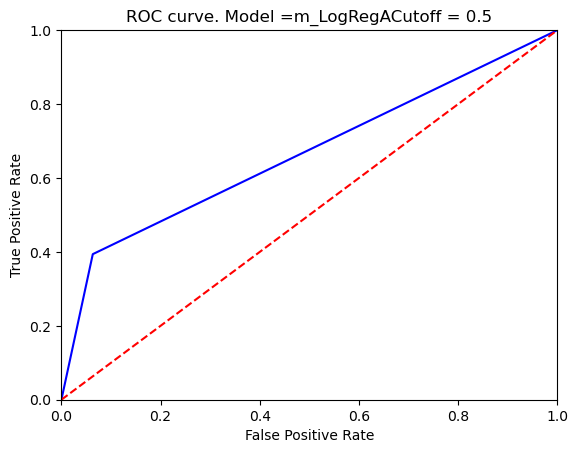

In [36]:
predicted_truncated = pred_rf[:len(testy1)]
evaluateModel("m_LogRegA", cutoff, testy1, predicted_truncated)

## ----------------